# K Means Clustering Algorithm

## Studi Kasus

Data yang anda miliki adalah data penjualan setelah terjadinya pandemi Covid-19 dengan kategori produk sports & apparel. Dikarenakan saat ini penjualan banyak dilakukan secara online, anda berencana untuk memperbaiki tampilan website dengan cara mengelompokkan produk berdasarkan kategori-kategori tertentu. Perombakan ini diharapkan dapat mempermudah pembeli dalam memilih barang sesuai dengan selera dan kebutuhan mereka. Untuk mencapai tujuan tersebut anda akan menggunakan history penjualan sebelumnya. Data yang anda miliki adalah sebagai berikut :

- Product Name : Nama produk 
- Product ID : Id unik produk
- Listing Price : Harga sebenarnya dari produk
- Sale Price : Harga saat produk dibeli
- Discount : Diskon yang diberikan dalam suatu produk
- Brand : Nama Brand dari produk
- Description : Deskripsi produk
- Rating : Rating yang diberikan user
- Reviews : Jumlah review suatu produk
- Last Visited : Record terakhir produk dikunjungi oleh customer

Selain mengelompokkan produk, anda juga ingin menganalisis persaingan yang terjadi pada tiap-tiap brand. Dengan mengetahui minat pembeli, harapannya untuk kedepannya anda dapat menyesuaikan store anda dengan kebutuhan pasar.

## Import Libraries and Data

In [74]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [75]:
# import package
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Package untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
path='/content/gdrive/MyDrive/MBKM Data Scientist/Dataset - DS - 15/'

In [77]:
data = pd.read_csv(os.path.join(path, "Clustering_product.csv"))
data.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14\t
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15\t
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15\t
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15\t
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15\t


> **Dalam materi ini, data preprocessing seperti cek missing value, duplicate data, data type tidak akan dilakukan, karena fokus dari materi adalah pada clustering. Anda dapat membuka kembali materi sebelumnya dan menerapkankan sendiri dalam materi ini jika ingin menganalisis secara lengkap.**

## Exploratory Data Analysis (EDA)

<Axes: >

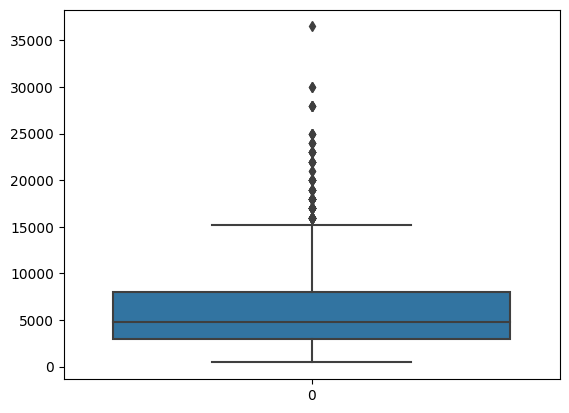

In [78]:
sns.boxplot(data["Sale Price"])

Dengan melihat persebaran harga jual maka harga jual rata rata didapatkan 5000

<Axes: >

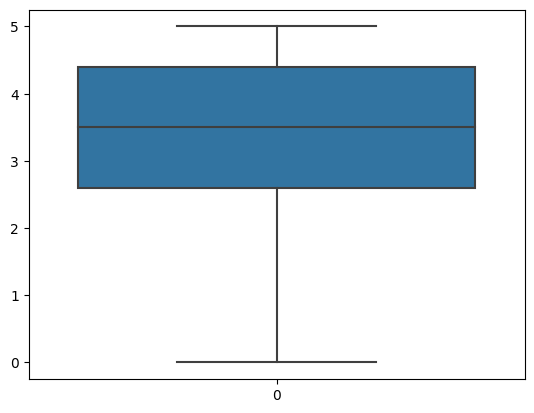

In [79]:
sns.boxplot(data['Rating'])

Rata rata didapatkan dari rating berkisar di 3,7

## Data Preprocessing

### Encode Categorical

In [80]:
categorical = ["Product Name", "Product ID", "Brand","Description","Last Visited\t"]
df_categorical = data[categorical]
df_categorical.head()

,Product Name,Product ID,Brand,Description,Last Visited\t
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,2020-04-13T15:06:14\t
1,Women's adidas Originals Sleek Shoes,G27341,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",2020-04-13T15:06:15\t
2,Women's adidas Swim Puka Slippers,CM0081,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2020-04-13T15:06:15\t
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",2020-04-13T15:06:15\t
4,Women's adidas Originals Taekwondo Shoes,D98205,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,2020-04-13T15:06:15\t


In [81]:

label_encoder = LabelEncoder()
encoded_data = data[categorical].apply(label_encoder.fit_transform)


cluster_data = pd.concat([encoded_data,data[["Listing Price", "Sale Price","Discount","Rating","Reviews"]]], axis=1)

cluster_data.head()

,Product Name,Product ID,Brand,Description,Last Visited\t,Listing Price,Sale Price,Discount,Rating,Reviews
0,1315,78,1,219,0,14999,7499,50,4.8,41
1,1331,3097,1,64,1,7599,3799,50,3.3,24
2,1458,1420,0,1492,1,999,599,40,2.6,37
3,1437,399,0,599,1,6999,3499,50,4.1,35
4,1346,1742,1,1640,1,7999,3999,50,3.5,72


### Features Selection
Dalam proses ini akan dipilih variabel yang memiliki pengaruh besar dalam penentuan cluster data.

/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


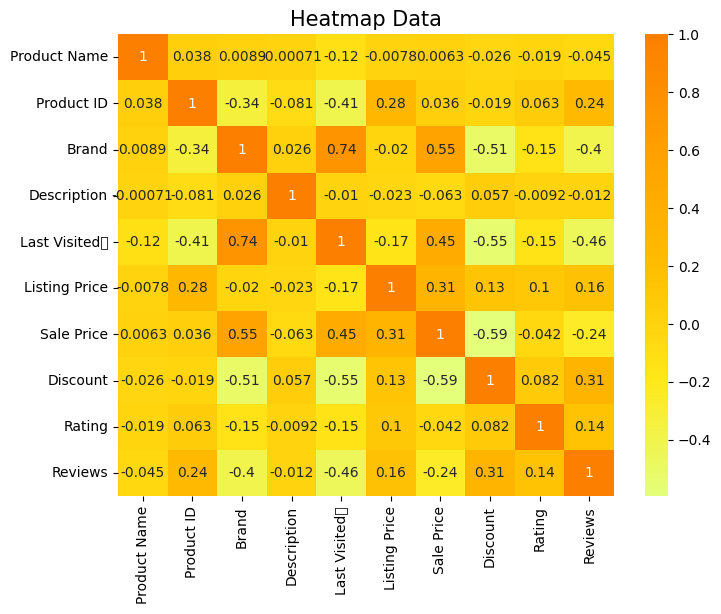

In [82]:
plt.figure(figsize=(8,6))
sns.heatmap(cluster_data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 15)
plt.show()

In [83]:
# Drop variabel yang tidak dibutuhkan
cluster_data = cluster_data.drop(["Description", 
                                  "Product Name", "Listing Price","Last Visited\t","Sale Price","Discount","Product ID","Reviews"], axis = 1)
cluster_data.head()

,Brand,Rating
0,1,4.8
1,1,3.3
2,0,2.6
3,0,4.1
4,1,3.5


### Scaling Data
Dalam clustering penggunaan scaling data juga diperlukan, hal ini akan membantu mengatasi permasalahan gap pada tiap kolom.

In [85]:
scaler = StandardScaler()
cluster_data[["Brand","Rating"]] = scaler.fit_transform(cluster_data[["Brand","Rating",]])
cluster_data.head()

,Brand,Rating
0,-0.213301,1.090476
1,-0.213301,0.040524
2,-1.105835,-0.449453
3,-1.105835,0.600498
4,-0.213301,0.180518


## KMeans Cluster

### Menentukan Nilai Optimal K (kelompok)

Akan digunakan metode Elbow untuk menentukan jumlah k optimal.

In [86]:
Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_data)
    Sum_of_squared_error.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

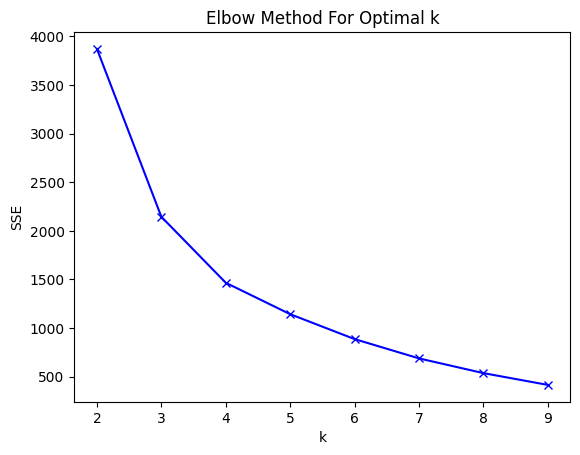

In [87]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

### Evaluation Model

Menggunakan silhouette score untuk konfirmasi k-kluster

In [88]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(cluster_data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_data, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.43448423444311574


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.4921123000982272


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.46319056242282775


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.47108604147053595


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.48434060880506835


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.5084872424103714


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.5498559609766883


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.5821793855738933


In [89]:
cluster = KMeans(n_clusters=9)
cluster.fit(cluster_data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9)

In [92]:
segment = pd.Series(cluster.labels_, name="segment")
results = pd.concat([data, segment], axis=1)
results.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14\t,3
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15\t,7
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15\t,1
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15\t,6
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15\t,7


In [93]:
results[results["segment"]==0][:5]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
72,Men's adidas Outdoor Elevate Sandals,CK9830,2799,1399,50,Adidas SPORT PERFORMANCE,Stylish and sleek adidas sandals for women are...,2.8,14,2020-04-13T15:06:20\t,0
93,Men's adidas Running PureBounce+ Clima Shoes,BC0836,8999,4499,50,Adidas SPORT PERFORMANCE,These running shoes are designed with 360 degr...,3.4,90,2020-04-13T15:06:22\t,0
102,Men's adidas Outdoor Terra Light Sandals,CL9928,3599,2159,40,Adidas SPORT PERFORMANCE,Step out in these adidas Terra Light sandals f...,2.4,41,2020-04-13T15:06:22\t,0
190,Men's adidas Outdoor Hoist 2019 Sandals,CK9843,2799,1679,40,Adidas SPORT PERFORMANCE,Stylish and sleek adidas Hoist sandals for men...,1.5,47,2020-04-13T15:06:26\t,0
197,Men's adidas Running Solar Drive Shoes,EF1426,9999,4999,50,Adidas SPORT PERFORMANCE,These men's shoes provide flexibility and supp...,3.2,50,2020-04-13T15:06:26\t,0


In [95]:
results[results["segment"]==1][:5]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15\t,1
7,Women's adidas Swim Puka Slippers,CM0080,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.8,7,2020-04-13T15:06:15\t,1
12,Women's adidas Running Duramo 9 Shoes,F35281,5999,2999,50,Adidas CORE / NEO,These women's neutral running shoes will get y...,2.6,97,2020-04-13T15:06:16\t,1
14,Men's adidas Sport Inspired Response Trail Shoes,EG0000,7999,3999,50,Adidas CORE / NEO,"When the road turns to trail, all that matters...",3.2,16,2020-04-13T15:06:16\t,1
15,Women's adidas Running Cosmic 2 Shoes,B44889,5999,2999,50,Adidas CORE / NEO,These women's running shoes have a breathable ...,3.1,69,2020-04-13T15:06:16\t,1


In [98]:
results[results["segment"]==2][:5]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
87,Men's adidas Outdoor Andorian Shoes,CM0031,4599,2299,50,Adidas SPORT PERFORMANCE,The adidas Andorian shoes for men are crafted ...,0.0,49,2020-04-13T15:06:21\t,2
578,Men's adidas Outdoor Tell Path 19 Shoes,CM0023,3999,1999,50,Adidas SPORT PERFORMANCE,The adidas Tell Path 19 shoes for men are craf...,1.0,27,2020-04-13T15:06:39\t,2
681,Men's adidas Outdoor Fassar Sandals,CL9946,2799,1679,40,Adidas SPORT PERFORMANCE,Step out in these adidas Fassar sandals for me...,0.0,33,2020-04-13T15:06:42\t,2
711,Men's adidas Outdoor Echo Sandals,CL9950,2799,1679,40,Adidas SPORT PERFORMANCE,Step out in these adidas Echo sandals for men....,1.0,16,2020-04-13T15:06:43\t,2
916,Men's adidas Running SenseBoost GO Shoes,EF1581,11999,7199,40,Adidas SPORT PERFORMANCE,Designed for the ever-changing urban landscape...,1.0,77,2020-04-13T15:06:50\t,2


In [102]:
results[results["segment"]==3][:5]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14\t,3
9,Men's adidas Originals Forest Grove Shoes,EE5761,6599,3959,40,Adidas ORIGINALS,The Forest Grove brings back the look of the a...,4.0,39,2020-04-13T15:06:15\t,3
11,Women's adidas Originals Continental Vulc Shoes,EF9315,6599,3959,40,Adidas ORIGINALS,These low-profile shoes come in a pastel color...,4.2,35,2020-04-13T15:06:16\t,3
52,Women's adidas Originals Marathon Tech Shoes,EE4954,11999,7199,40,Adidas ORIGINALS,"These shoes draft off the Marathon TR, a trail...",4.4,35,2020-04-13T15:06:19\t,3
53,Women's adidas Originals U_Path Run Shoes,G27996,7999,4799,40,Adidas ORIGINALS,The U_Path offers a sleek combination of retro...,4.8,18,2020-04-13T15:06:19\t,3


In [96]:
results[results["segment"]==4][:5]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
2632,Nike Free Metcon 3,CJ0861-017,0,9995,0,Nike,The Nike Free Metcon 3 combines Nike Free flex...,5.0,1,2020-04-13T15:27:59\t,4
2634,Nike Air Max 270 React ENG,CK2595-500,0,14995,0,Nike,The Nike Air Max 270 React ENG combines a full...,5.0,2,2020-04-13T15:27:59\t,4
2635,Nike Air Max 90,CD0490-104,0,9995,0,Nike,"Clean lines, versatile and timelessâ€”the peop...",5.0,9,2020-04-13T15:28:00\t,4
2636,Nike Air Force 1 '07,315115-112,0,7495,0,Nike,The radiance lives on in the Nike Air Force 1 ...,4.5,67,2020-04-13T15:28:00\t,4
2639,Nike Air VaporMax Flyknit 3,AJ6910-009,0,16995,0,Nike,Be bouncy and buoyant in the Nike Air VaporMax...,4.4,48,2020-04-13T15:28:01\t,4


In [97]:
results[results["segment"]==5][:5]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,4799,1920,60,Adidas CORE / NEO,Refine your interval training in these women's...,1.0,45,2020-04-13T15:06:15\t,5
16,Women's adidas Sport Inspired Storm Runner Shoes,CL7417,4599,2299,50,Adidas CORE / NEO,"A fast, lightweight adidas stormrunner shoes f...",1.0,16,2020-04-13T15:06:16\t,5
41,Women's adidas Running EnergyFalcon X Shoes,EE9941,6599,3959,40,Adidas CORE / NEO,"When you dig deep to reach your goals, these r...",1.5,32,2020-04-13T15:06:19\t,5
49,Women's adidas Sport Inspired Archivo Shoes,EF0446,4999,2999,40,Adidas CORE / NEO,A mix of modern comfort and authentic adidas h...,1.0,42,2020-04-13T15:06:19\t,5
60,Men's adidas Sports Inspired Lite Racer Shoes,EE8252,4299,2149,50,Adidas CORE / NEO,The ultra-lightweight build of these shoes tak...,1.5,6,2020-04-13T15:06:20\t,5


In [99]:
results[results["segment"]==6][:5]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15\t,6
6,Women's adidas Sport Inspired Duramo Lite 2.0 ...,CG4051,4799,2399,50,Adidas CORE / NEO,Refine your interval training in these women's...,4.4,2,2020-04-13T15:06:15\t,6
8,WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES,B75990,5599,2799,50,Adidas CORE / NEO,These women's neutral running shoes will get y...,4.5,16,2020-04-13T15:06:15\t,6
19,Women's adidas Sport Inspired Lite Racer Shoes,EE8245,4299,2149,50,Adidas CORE / NEO,Unstoppable style. These shoes borrow their li...,3.8,67,2020-04-13T15:06:16\t,6
20,Women's adidas Running Duramo 9 Shoes,EE8042,5599,2799,50,Adidas CORE / NEO,These women's neutral running shoes will get y...,5.0,30,2020-04-13T15:06:16\t,6


In [100]:
results[results["segment"]==7][:5]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15\t,7
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15\t,7
10,Women's adidas Originals Swift Run Shoes,EE4553,7599,4559,40,Adidas ORIGINALS,The Swift distills decades of adidas heritage ...,2.7,36,2020-04-13T15:06:16\t,7
13,Women's adidas Originals Supercourt Shoes,EF9220,7599,4559,40,Adidas ORIGINALS,"Forty years of court style, refined to the ess...",3.1,62,2020-04-13T15:06:16\t,7
80,Men's adidas Originals CAMPUS Low Shoes,BZ0086,7999,3999,50,Adidas ORIGINALS,This men's classic sneaker stays close to its ...,2.0,28,2020-04-13T15:06:21\t,7


In [101]:
results[results["segment"]==8][:5]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
84,Men's adidas Running Edge PR Shoes,AC8122,7999,3999,50,Adidas SPORT PERFORMANCE,"With a springy midsole and breathable upper, t...",4.2,66,2020-04-13T15:06:21\t,8
112,Men's adidas Outdoor Terra Light Sandals,CL9927,3599,2159,40,Adidas SPORT PERFORMANCE,Step out in these adidas Terra Light sandals f...,4.3,71,2020-04-13T15:06:23\t,8
115,Men's adidas Running PureBounce+ Street Shoes,B96360,7999,3999,50,Adidas SPORT PERFORMANCE,"Made for fast runs on city streets, these shoe...",4.5,7,2020-04-13T15:06:23\t,8
224,Men's adidas Outdoor Andorian Shoes,CM0030,4599,2299,50,Adidas SPORT PERFORMANCE,The adidas Andorian shoes for men are crafted ...,4.0,49,2020-04-13T15:06:27\t,8
236,Men's adidas Outdoor Naha Shoes,CM0009,5999,2999,50,Adidas SPORT PERFORMANCE,"Get maximum support, comfort and a refreshed l...",4.8,15,2020-04-13T15:06:27\t,8


## EDA


<Axes: xlabel='segment', ylabel='Rating'>

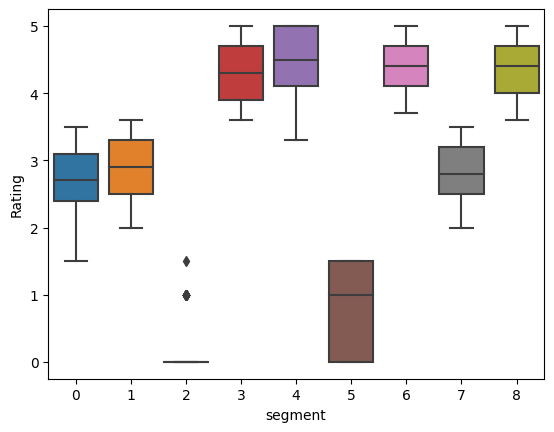

In [105]:
sns.boxplot(x=results["segment"], y=results["Rating"], data=results)

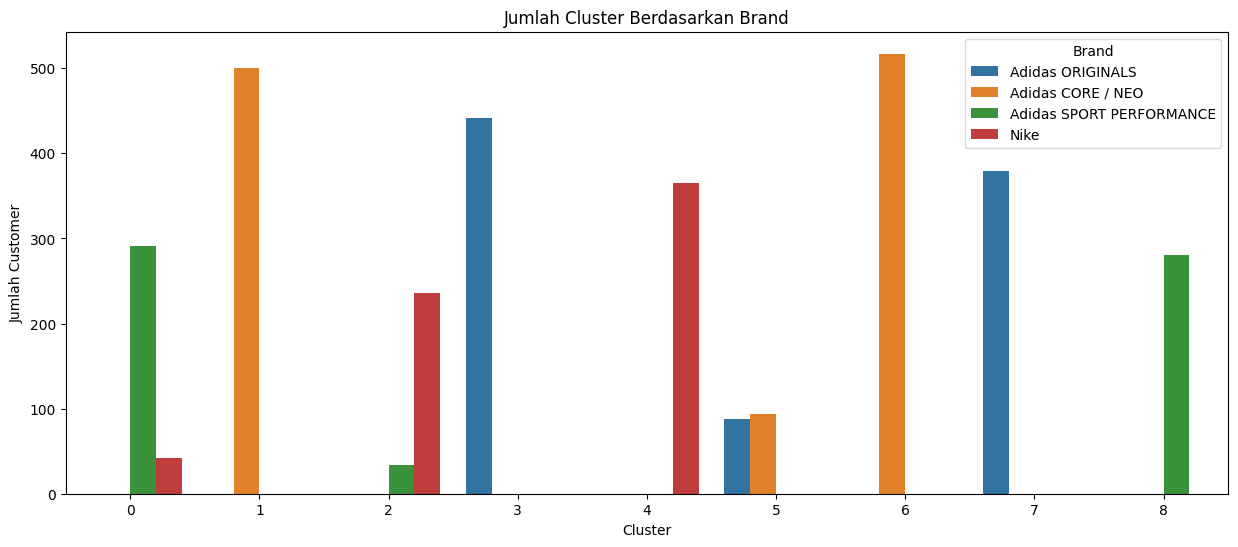

In [104]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=results, hue="Brand")
plt.title("Jumlah Cluster Berdasarkan Brand")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

Ada perbedaan yang cukup mencolok apabila dilihat dari pengaruh Brand. Dari visualisasi diatas diketahui bahwa :
- Cluster 0 : Cluster 0 ini memiliki kecenderungan membeli Brand adidas performance beserta nike
- Cluster 1 : Cluster 1 ini memiliki kecenderungan membeli brand adidas core/neo
- Cluster 2 : cluster 2 ini membeli nike dan juga adidas performance
- Cluster 3 : Cluster 3 ini membeli adidas originals
- Cluster 4 : Cluster 4 membeli sepatu dari brand nike
- Cluster 5 : Cluster 5 ini hampir setengahnya membeli adidas core/neo beserta adidas originals
- Cluster 6 : Cluster 6 ini membeli adidas core/neo
- Cluster 7 : Cluster 7 ini membeli adidas originals
- Cluster 8 : cluster 8 membeli adidas sport performance

dapat disimpulkan brand adidas memiliki jauh banyak peminat dibanding brand kompetitornya yaitu nike